# Proyecto de Marketing Bancario / Bank Marketing Project

---

## 📌 Introducción / Introduction

### 🧾 Versión en Español:
Predecir el comportamiento del cliente es una tarea fundamental en las estrategias modernas de marketing, especialmente en el sector bancario. Este proyecto se enfoca en construir un modelo predictivo para determinar si un cliente contratará un depósito a plazo, utilizando datos recolectados de campañas de marketing telefónicas previas realizadas por una institución bancaria portuguesa.

Mediante el análisis de estos datos históricos, buscamos identificar los factores que influyen en la decisión del cliente y desarrollar un modelo de aprendizaje automático que pueda ayudar a los bancos a optimizar futuras campañas de marketing.

### 🧾 English Version:
Predicting customer behavior is a crucial task in modern marketing strategies, especially in the banking sector. This project focuses on building a predictive model to determine whether a customer will subscribe to a term deposit, based on data collected from previous marketing campaigns carried out by a Portuguese banking institution.

By analyzing historical data from direct phone call campaigns, we aim to gain insights into the factors influencing customer decisions and to develop a machine learning model that can assist banks in optimizing future marketing efforts.

---

## 🎯 Objetivos / Objectives

### 🧾 Versión en Español:
- Explorar y comprender la estructura y el contenido del conjunto de datos.
- Realizar el preprocesamiento de datos, incluyendo el tratamiento de variables categóricas y valores faltantes.
- Llevar a cabo un análisis exploratorio de datos (EDA) para identificar patrones y correlaciones.
- Construir y evaluar modelos predictivos que clasifiquen si un cliente contratará o no un depósito a plazo (`yes` o `no`).
- Interpretar los resultados del modelo e identificar las características más influyentes.

### 🧾 English Version:
- Explore and understand the structure and content of the dataset.
- Perform data preprocessing, including handling categorical features and missing values.
- Conduct exploratory data analysis (EDA) to identify patterns and correlations.
- Build and evaluate predictive models to classify whether a client will subscribe to a term deposit (`yes` or `no`).
- Interpret model results and identify the most influential features.

---

## 📊 Descripción del Conjunto de Datos / Dataset Description

### 🧾 Versión en Español:
El conjunto de datos utilizado en este proyecto es el [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing) del repositorio UCI Machine Learning. Contiene información relacionada con campañas de marketing directo (llamadas telefónicas) realizadas por una institución bancaria portuguesa. El objetivo de clasificación es predecir si el cliente contratará un depósito a plazo (`y`).

- **Número de instancias:** 45,211  
- **Número de atributos:** 17 variables de entrada + 1 variable objetivo

#### 🔑 Características

**Información del Cliente:**
- `age`: Edad del cliente (numérica)
- `job`: Tipo de trabajo (categórica)
- `marital`: Estado civil (categórica)
- `education`: Nivel educativo (categórica)
- `default`: ¿Tiene crédito en mora? (binaria)
- `balance`: Saldo promedio anual en euros (numérica)
- `housing`: ¿Tiene préstamo hipotecario? (binaria)
- `loan`: ¿Tiene préstamo personal? (binaria)

**Información del Contacto:**
- `contact`: Tipo de comunicación utilizada (categórica: "cellular", "telephone")
- `day`: Día del último contacto en el mes (numérica)
- `month`: Mes del último contacto en el año (categórica)
- `duration`: Duración del último contacto en segundos (numérica)

**Información de la Campaña:**
- `campaign`: Número de contactos durante esta campaña (numérica)
- `pdays`: Días desde el último contacto previo (numérica, -1 significa que no fue contactado antes)
- `previous`: Número de contactos realizados antes de esta campaña (numérica)
- `poutcome`: Resultado de la campaña anterior (categórica)

#### 🎯 Variable Objetivo:
- `y`: ¿El cliente contrató un depósito a plazo? (binaria: `yes`, `no`)

> ⚠️ **Nota:** La variable `duration` está altamente correlacionada con la variable objetivo y debe tratarse con cuidado para evitar **fugas de información** (data leakage).

---

### 🧾 English Version:
The dataset used in this project is the [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing) from the UCI Machine Learning Repository. It contains data related to direct marketing campaigns (phone calls) carried out by a Portuguese banking institution. The classification goal is to predict whether the client will subscribe to a term deposit (`y`).

- **Number of instances:** 45,211  
- **Number of attributes:** 17 input features + 1 target variable

#### 🔑 Features

**Client Information:**
- `age`: Age of the client (numeric)
- `job`: Type of job (categorical)
- `marital`: Marital status (categorical)
- `education`: Education level (categorical)
- `default`: Has credit in default? (binary)
- `balance`: Average yearly balance in euros (numeric)
- `housing`: Has housing loan? (binary)
- `loan`: Has personal loan? (binary)

**Contact Information:**
- `contact`: Contact communication type (categorical: "cellular", "telephone")
- `day`: Last contact day of the month (numeric)
- `month`: Last contact month of the year (categorical)
- `duration`: Last contact duration in seconds (numeric)

**Campaign Information:**
- `campaign`: Number of contacts performed during this campaign (numeric)
- `pdays`: Number of days since the client was last contacted (numeric, -1 means never contacted)
- `previous`: Number of contacts performed before this campaign (numeric)
- `poutcome`: Outcome of the previous marketing campaign (categorical)

#### 🎯 Target Variable:
- `y`: Has the client subscribed to a term deposit? (binary: `yes`, `no`)

> ⚠️ **Note:** The `duration` variable is highly correlated with the target and should be handled carefully during training to avoid **data leakage**.

---

## 🛠️ Próximos Pasos / Next Steps

### 🧾 Versión en Español:
En las siguientes secciones, realizaremos el proceso de limpieza, exploración, modelado y evaluación de los datos para construir un sistema predictivo efectivo para la suscripción de depósitos a plazo.

### 🧾 English Version:
In the following sections, we will perform data cleaning, exploration, modeling, and evaluation to build an effective predictive system for term deposit subscription.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [4]:
# Load your DataFrame
df = pd.read_csv('datasets/bank-additional-full.csv', delimiter=';')
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

### Buscamos Datos faltantes

In [5]:
# Replace empty strings and custom placeholders with NaN
df.replace(['', ' ', 'NA', 'N/A', '?'], pd.NA, inplace=True)

# Then count missing values again
missing_per_column = df.isnull().sum()
print(missing_per_column)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Una vez encontrados, decidimos si eliminar datos o corregirlos

In [6]:
## now we know the word used for a missing feature is 'unknown'
df.replace(['unknown'], pd.NA, inplace=True)

# Then count missing values again
missing_per_column = df.isnull().sum()

#Check percentages of missing data
missing_percent = df.isnull().mean() * 100
print('Porcentaje de datos faltantes por variable')
print(missing_percent[missing_percent > 0].sort_values(ascending= 0))

Porcentaje de datos faltantes por variable
default      20.872584
education     4.202680
housing       2.403613
loan          2.403613
job           0.801204
marital       0.194231
dtype: float64


### Buscamos qué variables son las que entregan mayor información (relación lineal entre el target y las demás variables)

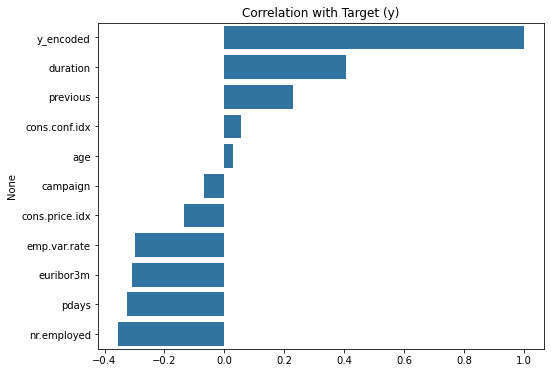

In [7]:
#determining linear relationship between y and numerical variables

df.fillna('unknown', inplace=True)

# Encode the target
df['y_encoded'] = df['y'].map({'no': 0, 'yes': 1})

# Select numeric features
numeric_cols = df.select_dtypes(include='number').columns

# Correlation matrix
correlations = df[numeric_cols].corrwith(df['y_encoded']).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Correlation with Target (y)")
plt.show()

El siguiente bloque de código calcula qué tan informativas son las variables para predecir la variable objetivo (y) usando información mutua (mutual information), y lo visualiza con un gráfico. Vamos paso por paso:

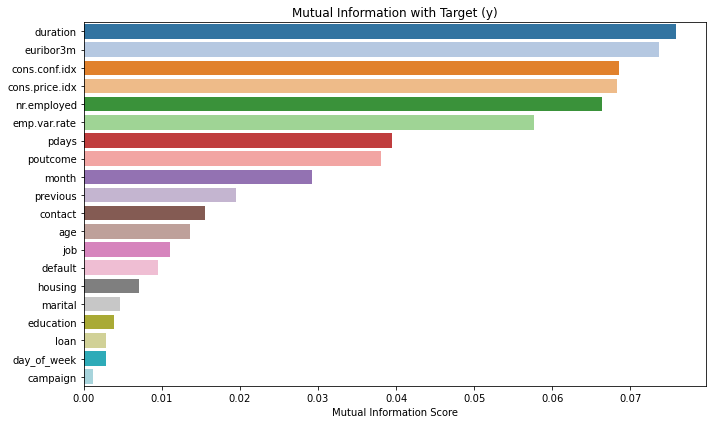

In [13]:
# First, convert categorical features using label encoding or keep as category dtype
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes
    

# Calcular la información mutua
X = df_encoded.drop(columns=['y', 'y_encoded'])
y = df_encoded['y_encoded']

mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab20", len(mi_series))

sns.barplot(
    x=mi_series.values,
    y=mi_series.index,
    hue=mi_series.index,           # Solución sugerida
    dodge=False,
    palette=palette,
    legend=False                   # Ocultar leyenda innecesaria
)

plt.title("Mutual Information with Target (y)")
plt.xlabel("Mutual Information Score")
plt.ylabel("")  # Quitar etiqueta del eje Y
plt.tight_layout()
plt.show()

### Entrenamos el modelo de machine learning

In [14]:
# Drop target column
X_all = df_encoded.drop(columns=['y', 'y_encoded'])
y = df_encoded['y_encoded']

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

print("Train accuracy:", model.score(X_train_scaled, y_train))
print("Test accuracy:", model.score(X_test_scaled, y_test))

Train accuracy: 0.9102276176024279
Test accuracy: 0.9102937606215101


### Entrenamos el modelo quitando las variables que no aportan información

In [16]:
# Filtrar variables con información mutua significativa
selected_cols = mi_series[mi_series > 0.013].index.tolist()
X_sel = df_encoded[selected_cols]
y = df_encoded['y_encoded']

# Dividir en entrenamiento (60%), validación (20%), prueba (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluar desempeño
print("Train accuracy:", accuracy_score(y_train, model.predict(X_train_scaled)))
print("Validation accuracy:", accuracy_score(y_val, model.predict(X_val_scaled)))
print("Test accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))

Train accuracy: 0.909153447717708
Validation accuracy: 0.9142995872784656
Test accuracy: 0.9101723719349356


## Conclusiones / Conclusions

### Comparación de modelos / Model Comparison

**Modelo 1** (Todas las variables):  
- Utiliza todas las variables del dataset tras codificación.  
- Accuracy en entrenamiento: aproximadamente 91%.  
- Accuracy en prueba: aproximadamente 91%.  
- División de datos: 80% entrenamiento / 20% prueba.  

**Model 1** (All variables):  
- Uses all dataset variables after encoding.  
- Training accuracy: approximately 91%.  
- Test accuracy: approximately 91%.  
- Data split: 80% training / 20% testing.  

**Modelo 2** (Variables seleccionadas por información mutua):  
- Usa solo variables con información mutua significativa (mi > 0.013).  
- Accuracy medida por separado en entrenamiento, validación y prueba.  
- División de datos: 60% entrenamiento / 20% validación / 20% prueba.  

**Model 2** (Selected variables via mutual information):  
- Uses only variables with significant mutual information (mi > 0.013).  
- Accuracy measured separately on training, validation, and test sets.  
- Data split: 60% training / 20% validation / 20% testing.  

### Conclusiones generales / General Conclusions

**Español:**  
- La selección de características reduce la dimensionalidad del modelo y mejora su interpretabilidad.  
- Si la precisión se mantiene similar al usar menos variables, significa que las seleccionadas contienen la mayoría de la información útil.  
- La división en tres conjuntos permite evaluar el modelo de manera más robusta.  
- Si el rendimiento baja, puede ajustarse el umbral de selección para incluir más variables relevantes.  

**English:**  
- Feature selection reduces model dimensionality and improves interpretability.  
- If accuracy remains similar with fewer variables, it means the selected ones contain most of the useful information.  
- Splitting into three sets allows for a more robust evaluation of model performance.  
- If performance drops, the selection threshold can be adjusted to include more relevant variables.  
